In [2]:
import threading as td
from queue import Queue
from time import sleep

# 1.1 添加任务

In [ ]:
def thread_job():
    print('测试线程001，线程名称：',td.current_thread())
    sleep(3) # 这里睡3秒 因为3秒后线程结束就注销了

# 1.2 添加线程

In [ ]:
def main():
    print('当前激活的线程数量：  ',td.active_count())
    print('当前激活的线程名称：  ',td.enumerate()   )
    print('正在运行的线程名称：  ',td.current_thread())
    print('===========================添加线程前=================================')
    
    added_thread = td.Thread(target = thread_job)
    added_thread.start()

    print('===========================添加线程后=================================')
    print('当前激活的线程数量：  ',td.active_count())
    print('当前激活的线程名称：  ',td.enumerate()   )
    print('正在运行的线程名称：  ',td.current_thread())
    
if __name__ == '__main__':
    main()

# 2.join功能

+ 为什么我们要有jion功能？  

当我们使用setDaemon(True)方法，设置子线程为守护线程时，主线程一旦执行结束，则全部线程全部被终止执行，可能出现的情况就是，子线程的任务还没有完全执行结束，就被迫停止。  
这时我们用jion就可以避免上述情况。

In [ ]:
# 不加join
def thread_job():
    
    print('测试线程002，开始！\n')
    for i in range(10):
        sleep(0.1)
    print('测试线程002，结束！\n')
    
def main():
    
    added_thread = td.Thread(target = thread_job, name='Test002')
    added_thread.start()
    print('====== 结束！ ======\n')
    
if __name__ == '__main__':
    main()
'''可以看到主线程在测试线程之前结束了'''

In [ ]:
# 添加join
def thread_job():
    
    print('测试线程002，开始！\n')
    for i in range(10):
        sleep(0.1)
    print('测试线程002，结束！\n')
    
def main():
    
    added_thread = td.Thread(target = thread_job, name='Test002')
    added_thread.start()
    added_thread.join()
    print('====== 结束！ ======\n')
    print('（^-^）看看我是最后一个吗？')
    
if __name__ == '__main__':
    main()
'''加了join之后主线程会等待子线程结束'''

# 3.Queue队列
多线程中的函数是没有返回值的，只能把每个线程的运算结果放到Queue里面，到主线程之后再拿出来，再继续加算。

In [1]:
# =============================================== 外部函数 ============================================================

# 这是一个外部定义的函数，多线程处理时。函数的参数要比平时多一个"q"。
def buy(code,price,amount,q):
    plus = code + price + amount
    q.put(plus)
    return plus # 这里的return没用

# =============================================== 外部函数 ============================================================



# ============================================== 多线程处理 ===========================================================


def buy_multithread(data): # buy()的多线程版
    # 1.定义： 一个队列，一个空表(放线程)，一个空表（从外部函数get出运算结果）
    q = Queue() # 一个队列
    threads_list = [] # 一个空表(放线程)
    results_list = [] # 一个空表（从外部函数get出运算结果）
    
    # 2.循环len次，每次都新建一个线程。**循环次数取决于后面传入的data **
    for i in range(len(data)):
        tem = data[i] # 拆data，放入后面外部函数的args中
        t = td.Thread(target=buy,args=(tem[0],tem[1],tem[2],q)) # 单独创建一个"t"线程。传参进去。
        t.start() # 运行
        t.join() # join线程① 可以在这里
        threads_list.append(t) # 线程添加到线程列表
    # 3.join线程
    for j in threads_list:
        j.join() # join线程② 可以在这里

    # 4.循环len次，从外部函数get出运算结果，存入结果列表
    for j in range(len(data)):
        results_list.append(q.get())
    return results_list # 这里的return没用


# ============================================== 多线程处理 ===========================================================

if __name__ == '__main__':
    key = [(600000,9.00,100), (600619,2.74,100)]
    a = buy_multithread(key) 
    print(a)

# ============================================== 多线程处理 ===========================================================

NameError: name 'Queue' is not defined

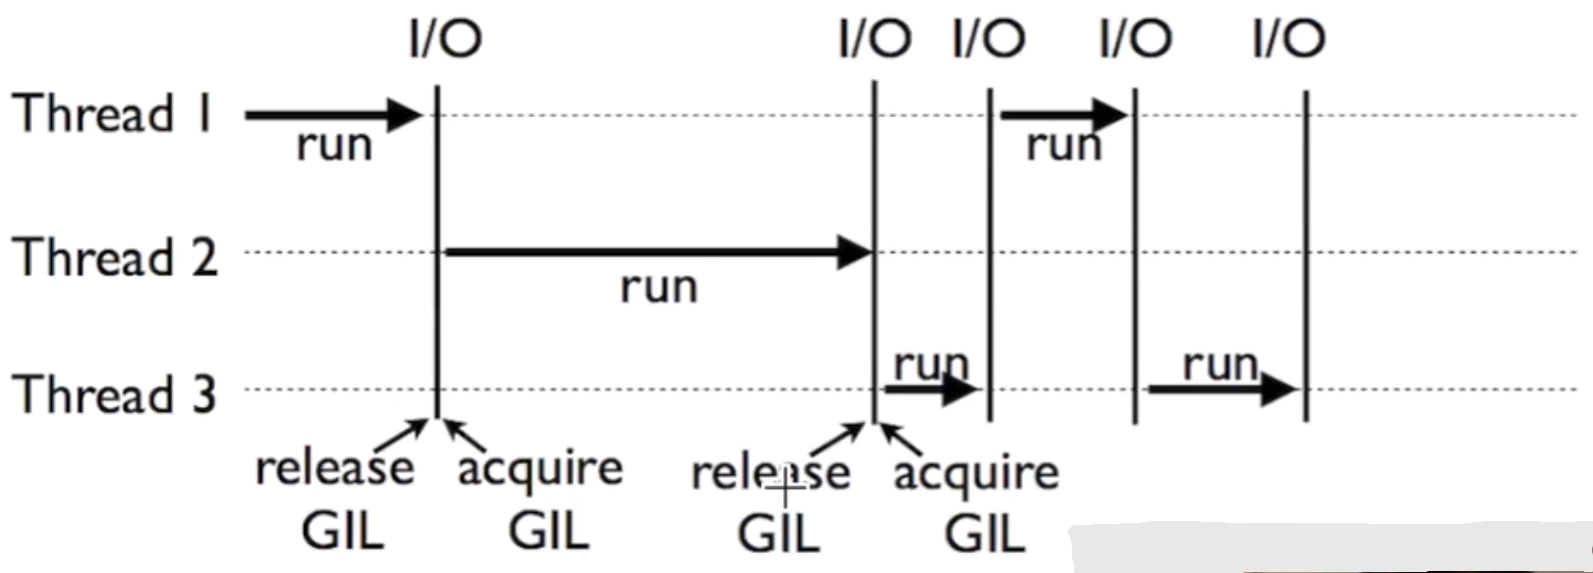

# lock锁
当涉及共同变量的时候。  
如果我们要等一个程序运行完，让这个程序的最终值再传递给下一个函数的话。  
就必须上锁，以防止其他函数在期间修改掉了共同变量。  

In [24]:
def buy():
    global A,lock
    
    
    lock.acquire() # 上锁
    for _ in range(10):
        A += 1
        print(f'buy → {A}\n')
    lock.release() # 开锁
    
    
def confirm():
    global A,lock
    
    
    lock.acquire() # 上锁
    for _ in range(10):
        A = A**1.1
        print(f'confirm → {A}\n')
    lock.release() # 开锁
    
    
if __name__ == '__main__':
    A = 0
    lock = td.Lock() # 引入锁
    t1 = td.Thread(target=buy)
    t2 = td.Thread(target=confirm)
    t1.start()
    t2.start()
    t1.join()
    t2.join()

buy → 1

buy → 2

buy → 3

buy → 4

buy → 5

buy → 6

buy → 7

buy → 8

buy → 9

buy → 10

confirm → 12.589254117941675

confirm → 16.21810097358931

confirm → 21.428906011200603

confirm → 29.113874126187575

confirm → 40.78589529626014

confirm → 59.09639651794997

confirm → 88.86220796871258

confirm → 139.18383863707638

confirm → 228.00674306334227

confirm → 392.4121630191998

